In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [24]:
data.shape

(21, 2)

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

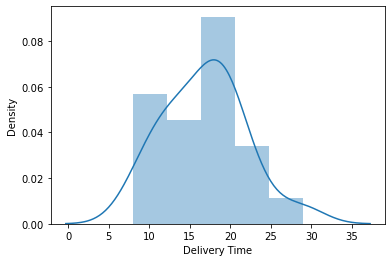

In [27]:
sns.distplot(data['Delivery Time'])

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

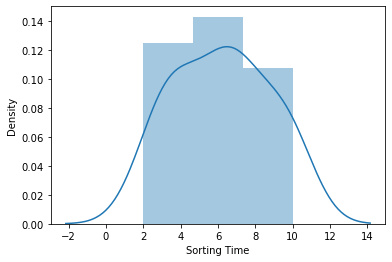

In [28]:
sns.distplot(data['Sorting Time'])

In [29]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

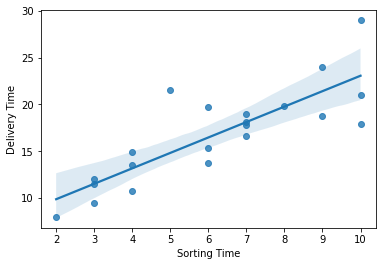

In [30]:
sns.regplot(x= data['Sorting Time'],y = data['Delivery Time'])

In [31]:
DATA = data.rename({'Delivery Time':'DT', 'Sorting Time':'ST'}, axis=1)
DATA.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

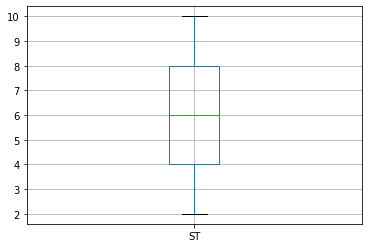

In [32]:
DATA.boxplot('ST')

<AxesSubplot:>

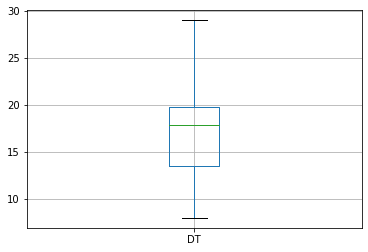

In [33]:
DATA.boxplot('DT')

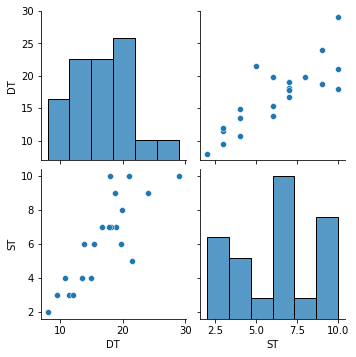

In [34]:

sns.pairplot(DATA)

In [35]:
model = smf.ols('DT~ST', data=DATA).fit()
model

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        22:24:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [38]:
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [39]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [40]:
new_data=pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [43]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,4
1,8


In [44]:
model.predict(data_pred)

0    13.178814
1    19.774893
dtype: float64

 Delivery time for Sortine Time 4 would be 13.17 AND
 Delivery time for Sortine Time 8 would be 19.77
